In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
#load the dataset
df =pd.read_csv("Churn_Modelling.csv")

In [60]:
# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get data types and basic information
print(df.info())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1        1.0             1.0   
1       1   83807.86              1        0.0             1.0   
2       8  159660.80              3        1.0             0.0   
3       1       0.00              2        0.0             0.0   
4       2  125510.82              1        NaN             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4      

In [61]:
# Fill missing categorical values with mode
df['Geography'] = df['Geography'].fillna(df['Geography'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Fill missing numerical values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['HasCrCard'] = df['HasCrCard'].fillna(df['HasCrCard'].mode()[0])
df['IsActiveMember'] = df['IsActiveMember'].fillna(df['IsActiveMember'].mode()[0])

In [62]:
#Drop not necessary columns
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [63]:
print(df.columns)

# One-hot encode 'Geography' column and convert to integer
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df[['Geography_Germany', 'Geography_Spain']] = df[['Geography_Germany', 'Geography_Spain']].astype(int)

# One-hot encode 'Gender' column and convert to integer
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df['Gender_Male'] = df['Gender_Male'].astype(int)

print(df.head())


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
   CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619  42.0       2       0.00              1        1.0   
1          608  41.0       1   83807.86              1        0.0   
2          502  42.0       8  159660.80              3        1.0   
3          699  39.0       1       0.00              2        0.0   
4          850  43.0       2  125510.82              1        1.0   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0             1.0        101348.88       1                  0   
1             1.0        112542.58       0                  0   
2             0.0        113931.57       1                  0   
3             0.0         93826.63       0                  0   
4             1.0         79084.10       0                  0   

   Geog

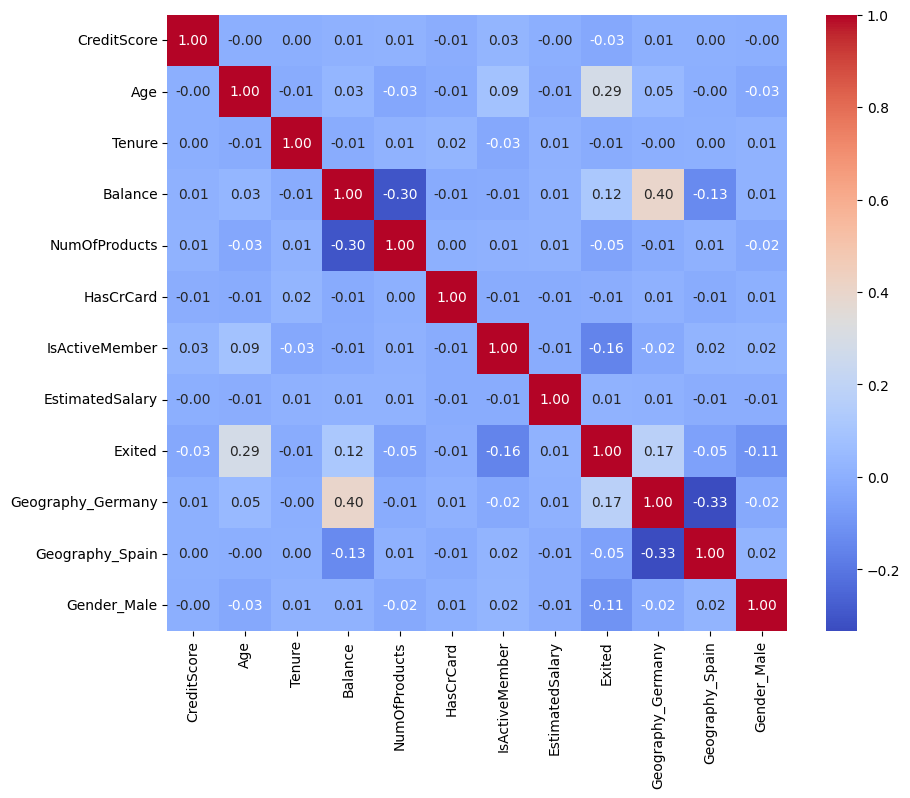

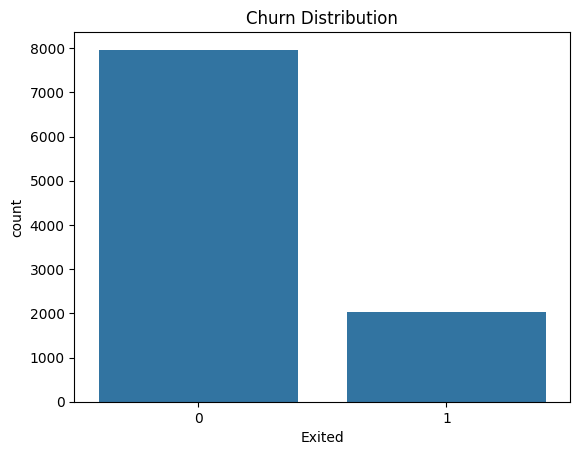

In [64]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Visualize churn distribution
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler

# Define the columns to scale
columns_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [66]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1599
           1       0.76      0.51      0.61       402

    accuracy                           0.87      2001
   macro avg       0.82      0.74      0.77      2001
weighted avg       0.86      0.87      0.86      2001



In [68]:
# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


              Feature  Importance
1                 Age    0.239965
7     EstimatedSalary    0.144854
3             Balance    0.143406
0         CreditScore    0.141973
4       NumOfProducts    0.128944
2              Tenure    0.081807
6      IsActiveMember    0.042786
8   Geography_Germany    0.026396
10        Gender_Male    0.018217
5           HasCrCard    0.017792
9     Geography_Spain    0.013861
